# Intro to Bartiq

## What problems do we solve?

We build tools which enable getting QREs as expressions instead of raw numbers.

Why it's important?

- Getting big number of QREs can be significantly faster
- Enables a more in-depth resource analysis

## What is QREF?

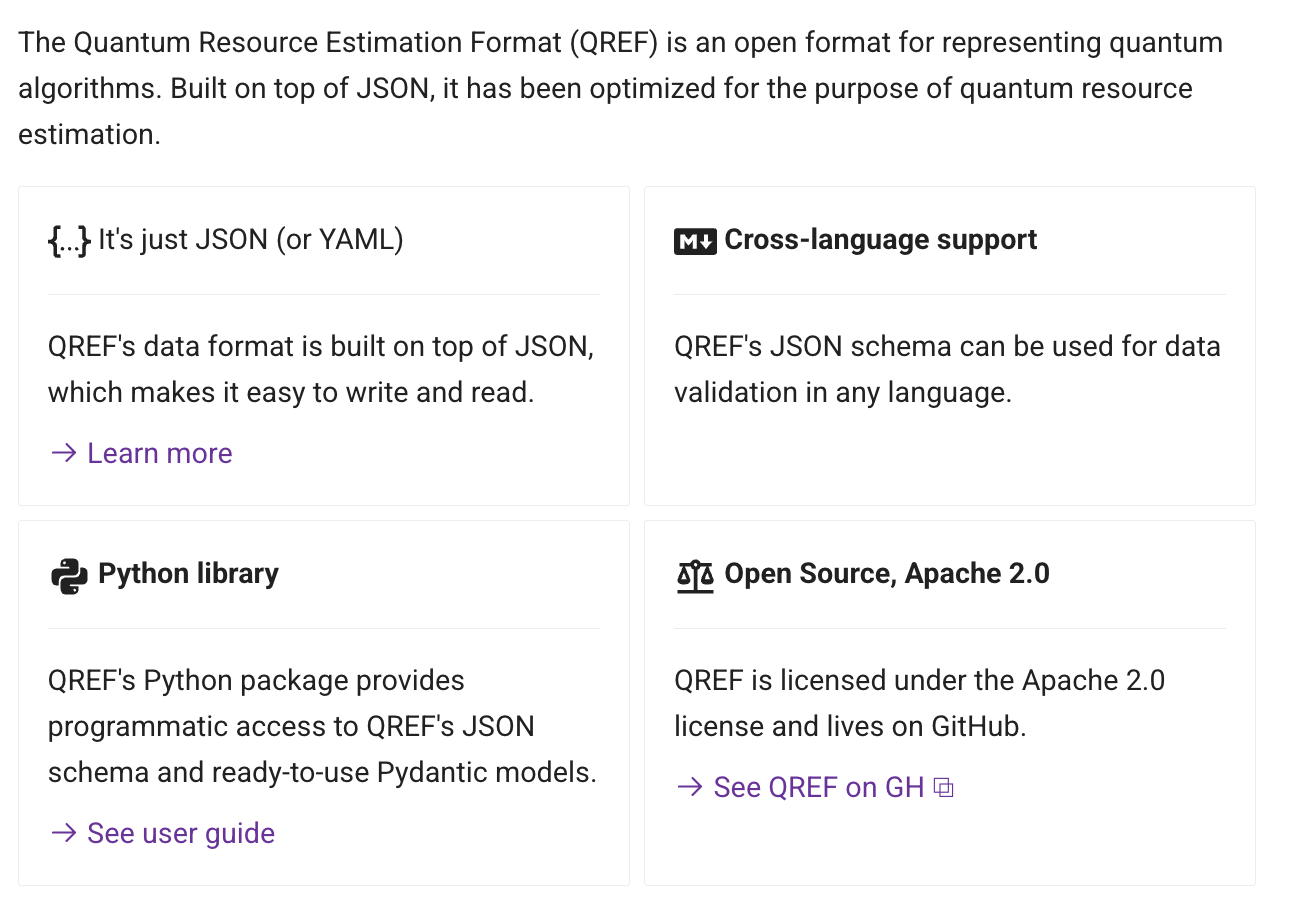

## QREF vs Bartiq

| QREF | Bartiq|
|------|--------|
| Serialization format | Library |
| Lives mostly as a JSON/YAML file | You can analyze and modify the Python objects |
| One format | Different classes representing different objects |
| Doesn't know about Bartiq | Bartiq can use QREF objects as inputs / outputs|

## Data structures in Bartiq

The fundamental data structure in Bartiq is `Routine`. 

For this tutorial, it's most important properties are:
- `children`
- `resources`
- `ports`
- `input_params`

Let's take a look at how it looks like for a particular routine:

In [11]:
import yaml
from qref import SchemaV1
from pprint import pprint
from bartiq import Routine, sympy_backend

with open("alias_sampling_example.yaml", "r") as f:
    raw_data = yaml.safe_load(f)

routine = Routine.from_qref(SchemaV1(**raw_data), sympy_backend)

In [13]:
routine.children.keys()

dict_keys(['usp', 'had', 'qrom', 'compare', 'swap'])

In [14]:
routine.children["usp"]

Routine(name='usp', type=None, children={}, ports={'in': Port(name='in', direction='input', size=R), 'out': Port(name='out', direction='output', size=R)}, resources={'T_gates': Resource(name='T_gates', type=<ResourceType.additive: 'additive'>, value=8*ceiling(log2(L/2**multiplicity(2, L))) - 8), 'rotations': Resource(name='rotations', type=<ResourceType.additive: 'additive'>, value=2)}, connections={}, repetition=None, constraints=(), children_order=(), input_params=['L'], linked_params={}, local_variables={'R': ceiling(log2(L))})

In [15]:
routine.children["usp"].resources

{'T_gates': Resource(name='T_gates', type=<ResourceType.additive: 'additive'>, value=8*ceiling(log2(L/2**multiplicity(2, L))) - 8),
 'rotations': Resource(name='rotations', type=<ResourceType.additive: 'additive'>, value=2)}

In [16]:
routine.children["usp"].ports

{'in': Port(name='in', direction='input', size=R),
 'out': Port(name='out', direction='output', size=R)}

In [17]:
routine.children["usp"].input_params

['L']

## Lifecycle of a routine

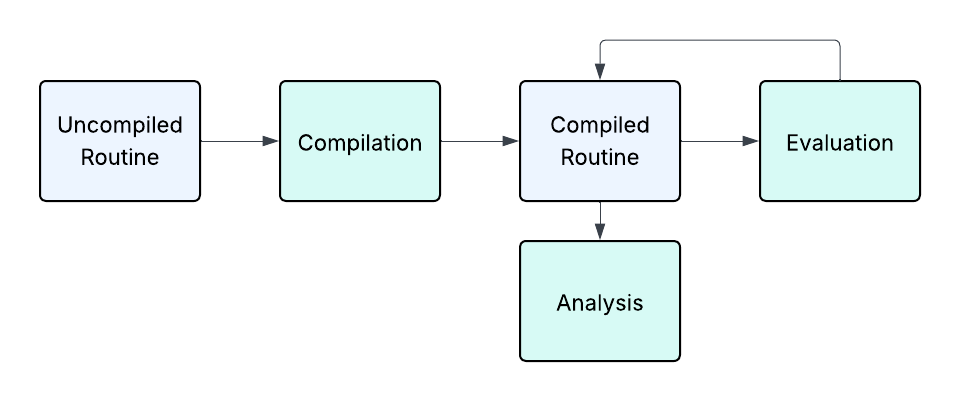

Let's understand it with [the Basic Example](https://github.com/PsiQ/bartiq/blob/main/docs/tutorials/01_basic_example.ipynb)!

## A more practical scenario – Alias Sampling

Now something more practical – [the Alias Sampling example](https://github.com/PsiQ/bartiq/blob/main/docs/tutorials/02_alias_sampling_basic.ipynb)!

## Bartiq's limitations

Limitations:
- Lack of tools for authoring programs
- Balance between exact and approximate costs
- Works only at the logical level

## Qualtran integration

We have written [QREF - Qualtran integration](https://github.com/quantumlib/Qualtran/tree/main/qualtran/qref_interop).

- It's a proof of concept
- If you'd like to try it out, please give us feedback!

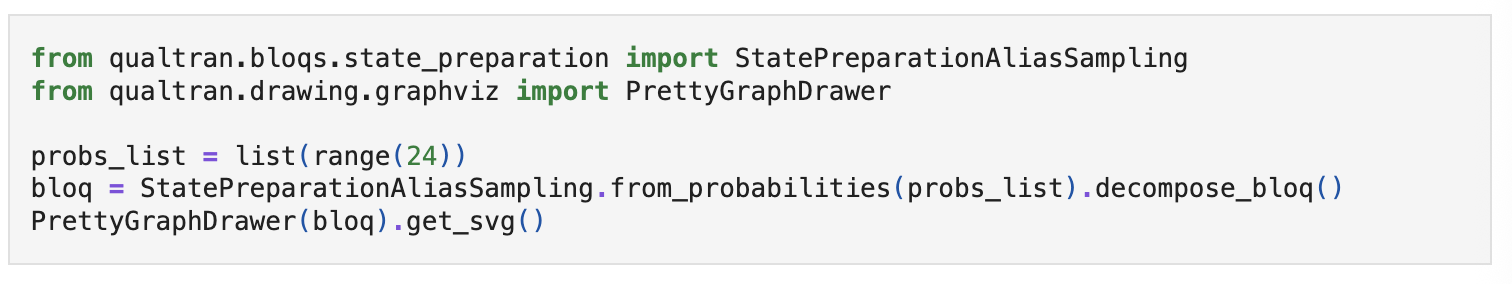

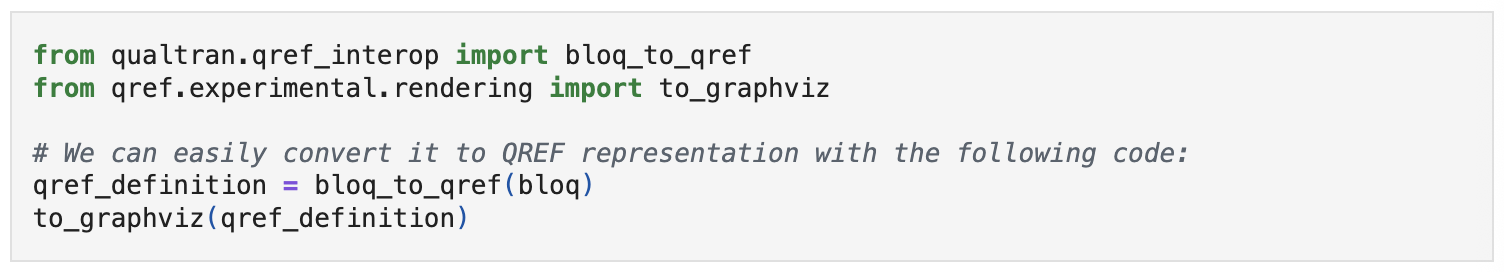

## Feedback

- We're a small development team and we'd love to hear your feedback!
- If you have a project where Bartiq looks like a good fit – let us know!
